In [2]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [4]:
# To set the Row, Column and Width of the Dataframe to show on Jupyter Notebook
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


# <font color = blue> EDA Case Study </font>

We have two different dataset which having all the informations of the client at the time of application that whether a client has payment difficulties or not and another dataset is related to the previous loan data which contains the data whether the previous application had been approval, cancelled, refused or unused offer.  
In this assignment, we will try to find some interesting insights if a client has difficulty paying their installments which may be used for taking action related to loan, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Previous Application Data.

Read the EDA Previous Application data file provided and store it in a dataframe `EDA_Prev_App`.
It contains the data whether the previous application had been approved, cancelled, refused or unused offer.


In [422]:
# Read the csv file using 'read_csv'.
EDA_Prev_App = pd.read_csv("F:/UpGrade/M_13_Case Study/Credit EDA Case Study-20210323T115611Z-001/Credit EDA Case Study/previous_application.csv")

In [423]:
EDA_Prev_App.head() #Showing all the EDA Previous Application data with headers

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [338]:
# Check the number of rows and columns in the dataframe
EDA_Prev_App.shape

(1048575, 37)

In [339]:
# Check the column-wise info of one dataframe Application
EDA_Prev_App.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

In [340]:
# To check Null values of columns
EDA_Prev_App_Null = EDA_Prev_App.isnull().sum()
EDA_Prev_App_Null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     233009
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                559396
AMT_GOODS_PRICE                 240965
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               559396
RATE_INTEREST_PRIMARY          1044854
RATE_INTEREST_PRIVILEGED       1044854
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 515140
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [424]:
# To reprsent the % or ratio of data imbalance in a dataframe 'Application_data'. 
EDA_Prev_App_Null_Per = round(100*(EDA_Prev_App.isnull().sum()/len(EDA_Prev_App.index)),3)
EDA_Prev_App_Null_Per

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.221
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_DOWN_PAYMENT               53.348
AMT_GOODS_PRICE                22.980
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
RATE_DOWN_PAYMENT              53.348
RATE_INTEREST_PRIMARY          99.645
RATE_INTEREST_PRIVILEGED       99.645
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_TYPE_SUITE                49.128
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_

In [425]:
# To check number of columns which has Null values greater than 30%
len(EDA_Prev_App_Null_Per[EDA_Prev_App_Null_Per.values>=(0.3)])

14

In [343]:
# List all the columns which values is greater than and equal t0 30%
EDA_Prev_Null_Per_30 = list(EDA_Prev_App_Null_Per[EDA_Prev_App_Null_Per.values>=0.3].index)
EDA_Prev_Null_Per_30

['AMT_ANNUITY',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [426]:
# Drop all the values which values is greater than equal to 30%.
EDA_Prev_App_Not_Null = EDA_Prev_App.drop(labels = EDA_Prev_Null_Per_30, axis=1, inplace=True)

In [427]:
# To check rows and columns of a dataframe
EDA_Prev_App.shape

(1048575, 23)

In [346]:
# Get information of columns of the dataframe
EDA_Prev_App.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_APPLICATION              1048575 non-null  float64
 4   AMT_CREDIT                   1048575 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 6   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1048575 non-null  object 
 10  NAME_CONTRACT_STATUS         1048575 non-null  object 
 11  DAYS_DECISION                1048575 non-null  int64  
 12  NAME_PAYMENT_TYPE            1048575 non-n

In [347]:
# Recheck the Null values of a dataframe with the remaining columns
EDA_Prev_App.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            224
dtype: int64

In [348]:
# To check % of variations of the updated dataframe columns
round(100*(EDA_Prev_App.isnull().sum()/len(EDA_Prev_App.index)),4)

SK_ID_PREV                     0.0000
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
AMT_APPLICATION                0.0000
AMT_CREDIT                     0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISION                  0.0000
NAME_PAYMENT_TYPE              0.0000
CODE_REJECT_REASON             0.0000
NAME_CLIENT_TYPE               0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_PORTFOLIO                 0.0000
NAME_PRODUCT_TYPE              0.0000
CHANNEL_TYPE                   0.0000
SELLERPLACE_AREA               0.0000
NAME_SELLER_INDUSTRY           0.0000
NAME_YIELD_GROUP               0.0000
PRODUCT_COMBINATION            0.0214
dtype: float64

In [428]:
# To check the details of the Null column with all the rows
EDA_Prev_App[EDA_Prev_App['PRODUCT_COMBINATION'].isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6664,2515161,222844,XNA,0.0,0.0,SATURDAY,8,Y,1,XAP,Canceled,-351,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,10,Connectivity,XNA,NaN
9029,1851920,417884,XNA,0.0,0.0,MONDAY,13,Y,1,XAP,Canceled,-291,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,30,Connectivity,XNA,NaN
17038,2389511,148922,XNA,0.0,0.0,TUESDAY,6,Y,1,XAP,Canceled,-395,XNA,XAP,New,XNA,XNA,XNA,Country-wide,20,Connectivity,XNA,NaN
24543,2494449,366626,XNA,0.0,0.0,WEDNESDAY,13,Y,1,XAP,Canceled,-418,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,41,Connectivity,XNA,NaN
24574,2781877,394843,XNA,0.0,0.0,SATURDAY,6,Y,1,XAP,Canceled,-601,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,42,Connectivity,XNA,NaN
25030,2785890,154490,XNA,0.0,0.0,TUESDAY,21,Y,1,XAP,Canceled,-516,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,35,Connectivity,XNA,NaN
39305,2457349,307803,XNA,0.0,0.0,WEDNESDAY,15,Y,1,XAP,Canceled,-307,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,50,Connectivity,XNA,NaN
39461,2456391,164367,XNA,0.0,0.0,SUNDAY,13,Y,1,XAP,Canceled,-338,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,55,Connectivity,XNA,NaN
52461,2447432,426909,XNA,0.0,0.0,THURSDAY,16,Y,1,XAP,Canceled,-344,XNA,XAP,New,XNA,XNA,XNA,Country-wide,30,Connectivity,XNA,NaN
61664,2022193,378447,XNA,0.0,0.0,THURSDAY,13,Y,1,XAP,Canceled,-476,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,50,Connectivity,XNA,NaN


In [429]:
# To count the values in a column
EDA_Prev_App['PRODUCT_COMBINATION'].value_counts()

Cash                              178352
POS household with interest       166869
POS mobile with interest          139176
Cash X-Sell: middle                89806
Cash X-Sell: low                   80873
Card Street                        70951
POS industry with interest         62492
POS household without interest     52747
Card X-Sell                        50490
Cash Street: high                  37235
Cash X-Sell: high                  36813
Cash Street: middle                21616
Cash Street: low                   21166
POS mobile without interest        15181
POS other with interest            15072
POS industry without interest       7856
POS others without interest         1656
Name: PRODUCT_COMBINATION, dtype: int64

In [430]:
# PRODUCT_COMBINATION column has very minimum Nul values, therefore those rows can be removed
EDA_Prev_App = EDA_Prev_App[~EDA_Prev_App.PRODUCT_COMBINATION.isnull()]

In [431]:
# To recheck Null values for 'PRODUCT_COMBINATION'column
EDA_Prev_App.PRODUCT_COMBINATION.isnull().sum()

0

In [432]:
# To count the values in a column
EDA_Prev_App['PRODUCT_COMBINATION'].value_counts()

Cash                              178352
POS household with interest       166869
POS mobile with interest          139176
Cash X-Sell: middle                89806
Cash X-Sell: low                   80873
Card Street                        70951
POS industry with interest         62492
POS household without interest     52747
Card X-Sell                        50490
Cash Street: high                  37235
Cash X-Sell: high                  36813
Cash Street: middle                21616
Cash Street: low                   21166
POS mobile without interest        15181
POS other with interest            15072
POS industry without interest       7856
POS others without interest         1656
Name: PRODUCT_COMBINATION, dtype: int64

In [433]:
# Recheck the dataframe if still there is any null values
EDA_Prev_App.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [355]:
EDA_Prev_App.shape # To check the Shape of the dataframe

(1048351, 23)

In [356]:
# To check the information of the updated dataframe columns
EDA_Prev_App.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048351 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048351 non-null  int64  
 1   SK_ID_CURR                   1048351 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048351 non-null  object 
 3   AMT_APPLICATION              1048351 non-null  float64
 4   AMT_CREDIT                   1048351 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1048351 non-null  object 
 6   HOUR_APPR_PROCESS_START      1048351 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1048351 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1048351 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1048351 non-null  object 
 10  NAME_CONTRACT_STATUS         1048351 non-null  object 
 11  DAYS_DECISION                1048351 non-null  int64  
 12  NAME_PAYMENT_TYPE            1048351 non-n

In [434]:
# To count values for the particular column
EDA_Prev_App['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         465861
Consumer loans     461049
Revolving loans    121441
Name: NAME_CONTRACT_TYPE, dtype: int64

In [435]:
# To count values for the particular column
EDA_Prev_App['NAME_PORTFOLIO'].value_counts(normalize=True) 

POS      0.416698
Cash     0.274249
XNA      0.222046
Cards    0.086741
Cars     0.000266
Name: NAME_PORTFOLIO, dtype: float64

In [436]:
# To count values for the particular column
EDA_Prev_App['NAME_PRODUCT_TYPE'].value_counts(normalize=True)

XNA        0.63901
x-sell     0.27131
walk-in    0.08968
Name: NAME_PRODUCT_TYPE, dtype: float64

In [437]:
# Get selected useful columns of 'Application_data' in a new dataframe for analysis
EDA_Prev_App_list = EDA_Prev_App.loc[:,["SK_ID_PREV","SK_ID_CURR", "NAME_CONTRACT_TYPE", "NAME_CONTRACT_STATUS","AMT_APPLICATION","AMT_CREDIT", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "NAME_CASH_LOAN_PURPOSE","DAYS_DECISION","NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "NAME_CLIENT_TYPE", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION"]]

In [438]:
EDA_Prev_App_list.head() # To show various columns of the New Dataframe

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,Approved,17145.0,17145.0,SATURDAY,15,XAP,-73,Cash through the bank,XAP,Repeater,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,Approved,607500.0,679671.0,THURSDAY,11,XNA,-164,XNA,XAP,Repeater,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,Approved,112500.0,136444.5,TUESDAY,11,XNA,-301,Cash through the bank,XAP,Repeater,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,Approved,450000.0,470790.0,MONDAY,7,XNA,-512,Cash through the bank,XAP,Repeater,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,Refused,337500.0,404055.0,THURSDAY,9,Repairs,-781,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high


In [439]:
# To make absolute value for 'DAYS_DECISION' column
EDA_Prev_App_list['DAYS_DECISION'] = EDA_Prev_App_list['HOUR_APPR_PROCESS_START'].abs()
EDA_Prev_App_list['DAYS_DECISION'] = EDA_Prev_App_list['DAYS_DECISION'].abs()

In [440]:
# To check Null values 
EDA_Prev_App_list.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
NAME_CONTRACT_STATUS          0
AMT_APPLICATION               0
AMT_CREDIT                    0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
NAME_CASH_LOAN_PURPOSE        0
DAYS_DECISION                 0
NAME_PAYMENT_TYPE             0
CODE_REJECT_REASON            0
NAME_CLIENT_TYPE              0
NAME_PORTFOLIO                0
NAME_PRODUCT_TYPE             0
CHANNEL_TYPE                  0
NAME_SELLER_INDUSTRY          0
NAME_YIELD_GROUP              0
PRODUCT_COMBINATION           0
dtype: int64

In [441]:
# To get information of the dataframe
EDA_Prev_App_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048351 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  1048351 non-null  int64  
 1   SK_ID_CURR                  1048351 non-null  int64  
 2   NAME_CONTRACT_TYPE          1048351 non-null  object 
 3   NAME_CONTRACT_STATUS        1048351 non-null  object 
 4   AMT_APPLICATION             1048351 non-null  float64
 5   AMT_CREDIT                  1048351 non-null  float64
 6   WEEKDAY_APPR_PROCESS_START  1048351 non-null  object 
 7   HOUR_APPR_PROCESS_START     1048351 non-null  int64  
 8   NAME_CASH_LOAN_PURPOSE      1048351 non-null  object 
 9   DAYS_DECISION               1048351 non-null  int64  
 10  NAME_PAYMENT_TYPE           1048351 non-null  object 
 11  CODE_REJECT_REASON          1048351 non-null  object 
 12  NAME_CLIENT_TYPE            1048351 non-null  object 
 1

In [442]:
# To count and check values in a column
EDA_Prev_App_list['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.444375
Consumer loans     0.439785
Revolving loans    0.115840
Name: NAME_CONTRACT_TYPE, dtype: float64

In [443]:
# To count and check values in a column
EDA_Prev_App_list['NAME_CONTRACT_STATUS'].value_counts(normalize=True)

Approved        0.622393
Canceled        0.187939
Refused         0.173667
Unused offer    0.016001
Name: NAME_CONTRACT_STATUS, dtype: float64

In [444]:
# To count and check values in a column
EDA_Prev_App_list['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)

TUESDAY      0.152859
WEDNESDAY    0.152366
MONDAY       0.151802
FRIDAY       0.150818
THURSDAY     0.148792
SATURDAY     0.144517
SUNDAY       0.098846
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

In [447]:
# To count and check values in a column
EDA_Prev_App_list['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)

XAP                                 0.555625
XNA                                 0.403030
Repairs                             0.014086
Other                               0.009218
Urgent needs                        0.005064
Buying a used car                   0.001702
Building a house or an annex        0.001604
Everyday expenses                   0.001418
Medicine                            0.001337
Payments on other loans             0.001154
Education                           0.000930
Journey                             0.000711
Purchase of electronic equipment    0.000614
Buying a new car                    0.000608
Wedding / gift / holiday            0.000567
Buying a home                       0.000521
Car repairs                         0.000470
Furniture                           0.000453
Buying a holiday home / land        0.000319
Business development                0.000242
Gasification / water supply         0.000194
Buying a garage                     0.000080
Hobby     

#### The above object column has few annoying values like 'XAP', 'XNA', which doesn't have any meaning. These values has very high % in the table, therefore better to remove both of them.

In [448]:
# To replace 'XNA', 'XAP' from another highest value of the respective column
EDA_Prev_App_list['NAME_CASH_LOAN_PURPOSE'] = EDA_Prev_App_list['NAME_CASH_LOAN_PURPOSE'].replace(['XAP'],'Repairs')
EDA_Prev_App_list['NAME_CASH_LOAN_PURPOSE'] = EDA_Prev_App_list['NAME_CASH_LOAN_PURPOSE'].replace(['XNA'],'Other')


In [449]:
# To count and check values in a column
EDA_Prev_App_list['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)

Repairs                             0.569711
Other                               0.412248
Urgent needs                        0.005064
Buying a used car                   0.001702
Building a house or an annex        0.001604
Everyday expenses                   0.001418
Medicine                            0.001337
Payments on other loans             0.001154
Education                           0.000930
Journey                             0.000711
Purchase of electronic equipment    0.000614
Buying a new car                    0.000608
Wedding / gift / holiday            0.000567
Buying a home                       0.000521
Car repairs                         0.000470
Furniture                           0.000453
Buying a holiday home / land        0.000319
Business development                0.000242
Gasification / water supply         0.000194
Buying a garage                     0.000080
Hobby                               0.000030
Money for a third person            0.000015
Refusal to

In [450]:
# To count and check values in a column
EDA_Prev_App_list['NAME_PAYMENT_TYPE'].value_counts(normalize=True)

Cash through the bank                        0.620597
XNA                                          0.373765
Non-cash from your account                   0.004992
Cashless from the account of the employer    0.000646
Name: NAME_PAYMENT_TYPE, dtype: float64

In [451]:
# To replace 'XNA' from another highest value of the respective column
EDA_Prev_App_list['NAME_PAYMENT_TYPE'] = EDA_Prev_App_list['NAME_PAYMENT_TYPE'].replace(['XNA'],'Cash through the bank')


In [452]:
# To count and check values in a column
EDA_Prev_App_list['NAME_PAYMENT_TYPE'].value_counts(normalize=True)

Cash through the bank                        0.994363
Non-cash from your account                   0.004992
Cashless from the account of the employer    0.000646
Name: NAME_PAYMENT_TYPE, dtype: float64

In [453]:
# To count and check values in a column
EDA_Prev_App_list['CODE_REJECT_REASON'].value_counts(normalize=True)

XAP       0.810327
HC        0.104376
LIMIT     0.033622
SCO       0.022389
CLIENT    0.016001
SCOFR     0.007601
XNA       0.003149
VERIF     0.002091
SYSTEM    0.000444
Name: CODE_REJECT_REASON, dtype: float64

In [454]:
# To replace 'XAP' with highest available value after 'XAP' 
EDA_Prev_App_list['CODE_REJECT_REASON'] = EDA_Prev_App_list['CODE_REJECT_REASON'].replace(['XAP'],'HC')


In [301]:
# To remove those unwanted rows of 'XNA'
EDA_Prev_App_list = EDA_Prev_App_list.drop(EDA_Prev_App_list.loc[EDA_Prev_App_list['CODE_REJECT_REASON']=='XNA'].index)


In [455]:
# To count and check values in a column
EDA_Prev_App_list['CODE_REJECT_REASON'].value_counts(normalize=True)


HC        0.914703
LIMIT     0.033622
SCO       0.022389
CLIENT    0.016001
SCOFR     0.007601
XNA       0.003149
VERIF     0.002091
SYSTEM    0.000444
Name: CODE_REJECT_REASON, dtype: float64

In [456]:
# To count and check values in a column
EDA_Prev_App_list['NAME_CLIENT_TYPE'].value_counts(normalize=True)


Repeater     0.736168
New          0.181215
Refreshed    0.081456
XNA          0.001161
Name: NAME_CLIENT_TYPE, dtype: float64

In [457]:
# To drop unwanted rows
EDA_Prev_App_list = EDA_Prev_App_list.drop(EDA_Prev_App_list.loc[EDA_Prev_App_list['NAME_CLIENT_TYPE']=='XNA'].index)


In [458]:
# To count and check values in a column
EDA_Prev_App_list['NAME_CLIENT_TYPE'].value_counts(normalize=True)


Repeater     0.737023
New          0.181426
Refreshed    0.081551
Name: NAME_CLIENT_TYPE, dtype: float64

In [459]:
# To count and check values in a column
EDA_Prev_App_list['NAME_PORTFOLIO'].value_counts(normalize=True)


POS      0.416910
Cash     0.274376
XNA      0.221667
Cards    0.086781
Cars     0.000266
Name: NAME_PORTFOLIO, dtype: float64

In [460]:
# To drop unwanted rows
EDA_Prev_App_list['NAME_PORTFOLIO'] = EDA_Prev_App_list['NAME_PORTFOLIO'].replace(['XNA'],'POS')

#EDA_Prev_App_list = EDA_Prev_App_list.drop(EDA_Prev_App_list.loc[EDA_Prev_App_list['NAME_PORTFOLIO']=='XNA'].index)

In [461]:
# To count and check values in a column
EDA_Prev_App_list['NAME_PORTFOLIO'].value_counts(normalize=True)


POS      0.638577
Cash     0.274376
Cards    0.086781
Cars     0.000266
Name: NAME_PORTFOLIO, dtype: float64

In [463]:
# To count and check values in a column
EDA_Prev_App_list['NAME_PRODUCT_TYPE'].value_counts(normalize=True)


XNA        0.638844
x-sell     0.271423
walk-in    0.089734
Name: NAME_PRODUCT_TYPE, dtype: float64

In [464]:
# To replace 'XNA' from another highest value of the respective column
EDA_Prev_App_list['NAME_PRODUCT_TYPE'] = EDA_Prev_App_list['NAME_PRODUCT_TYPE'].replace(['XNA'],'x-sell')


In [465]:
# To count and check values in a column
EDA_Prev_App_list['NAME_PRODUCT_TYPE'].value_counts(normalize=True)


x-sell     0.910266
walk-in    0.089734
Name: NAME_PRODUCT_TYPE, dtype: float64

In [466]:
# To count and check values in a column
EDA_Prev_App_list['CHANNEL_TYPE'].value_counts(normalize=True)


Credit and cash offices       0.430001
Country-wide                  0.298210
Stone                         0.128092
Regional / Local              0.065482
Contact center                0.039987
AP+ (Cash loan)               0.034174
Channel of corporate sales    0.003772
Car dealer                    0.000282
Name: CHANNEL_TYPE, dtype: float64

In [467]:
# To count and check values in a column
EDA_Prev_App_list['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)


XNA                     0.508742
Consumer electronics    0.240843
Connectivity            0.165913
Furniture               0.034857
Construction            0.017888
Clothing                0.014343
Industry                0.011723
Auto technology         0.003041
Jewelry                 0.001652
MLM partners            0.000706
Tourism                 0.000292
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [468]:
# To replace 'XNA' from another highest value of the respective column
EDA_Prev_App_list['NAME_SELLER_INDUSTRY'] = EDA_Prev_App_list['NAME_SELLER_INDUSTRY'].replace(['XNA'],'Consumer electronics')


In [469]:
# To count and recheck values in a column
EDA_Prev_App_list['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)


Consumer electronics    0.749585
Connectivity            0.165913
Furniture               0.034857
Construction            0.017888
Clothing                0.014343
Industry                0.011723
Auto technology         0.003041
Jewelry                 0.001652
MLM partners            0.000706
Tourism                 0.000292
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [470]:
# To count and check values in a column
EDA_Prev_App_list['NAME_YIELD_GROUP'].value_counts(normalize=True)


XNA           0.308448
middle        0.231253
high          0.211873
low_normal    0.192908
low_action    0.055518
Name: NAME_YIELD_GROUP, dtype: float64

In [471]:
# To replace 'XNA' from another highest value of the respective column
EDA_Prev_App_list['NAME_YIELD_GROUP'] = EDA_Prev_App_list['NAME_YIELD_GROUP'].replace(['XNA'],'middle')


In [472]:
# To count and check values in a column
EDA_Prev_App_list['NAME_YIELD_GROUP'].value_counts(normalize=True)


middle        0.539701
high          0.211873
low_normal    0.192908
low_action    0.055518
Name: NAME_YIELD_GROUP, dtype: float64

In [473]:
# To count and check values in a column
EDA_Prev_App_list['PRODUCT_COMBINATION'].value_counts(normalize=True)


Cash                              0.169766
POS household with interest       0.159283
POS mobile with interest          0.132832
Cash X-Sell: middle               0.085705
Cash X-Sell: low                  0.077144
Card Street                       0.067679
POS industry with interest        0.059632
POS household without interest    0.050325
Card X-Sell                       0.048174
Cash Street: high                 0.035559
Cash X-Sell: high                 0.035144
Cash Street: middle               0.020643
Cash Street: low                  0.020181
POS mobile without interest       0.014476
POS other with interest           0.014383
POS industry without interest     0.007495
POS others without interest       0.001579
Name: PRODUCT_COMBINATION, dtype: float64

In [474]:
EDA_Prev_App_list.head() # To see all the columns again if there is any issue in the column values

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,Approved,17145.0,17145.0,SATURDAY,15,Repairs,15,Cash through the bank,HC,Repeater,POS,x-sell,Country-wide,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,Approved,607500.0,679671.0,THURSDAY,11,Other,11,Cash through the bank,HC,Repeater,Cash,x-sell,Contact center,Consumer electronics,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,Approved,112500.0,136444.5,TUESDAY,11,Other,11,Cash through the bank,HC,Repeater,Cash,x-sell,Credit and cash offices,Consumer electronics,high,Cash X-Sell: high
3,2819243,176158,Cash loans,Approved,450000.0,470790.0,MONDAY,7,Other,7,Cash through the bank,HC,Repeater,Cash,x-sell,Credit and cash offices,Consumer electronics,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,Refused,337500.0,404055.0,THURSDAY,9,Repairs,9,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,Consumer electronics,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2230795,255000,Consumer loans,Refused,210960.0,189864.0,SUNDAY,15,Repairs,15,Cash through the bank,LIMIT,Repeater,POS,x-sell,Stone,Industry,middle,POS other with interest
1048571,1823303,158245,Cash loans,Refused,0.0,0.0,TUESDAY,18,Other,18,Cash through the bank,SCOFR,Repeater,POS,x-sell,Credit and cash offices,Consumer electronics,middle,Cash
1048572,1730537,429268,Consumer loans,Approved,38070.0,36526.5,SUNDAY,12,Repairs,12,Cash through the bank,HC,New,POS,x-sell,Country-wide,Connectivity,low_normal,POS mobile with interest
1048573,2100360,389043,Consumer loans,Approved,35356.5,30109.5,SATURDAY,18,Repairs,18,Cash through the bank,HC,Repeater,POS,x-sell,Country-wide,Connectivity,low_normal,POS mobile with interest


### Do Univeriate analysis 

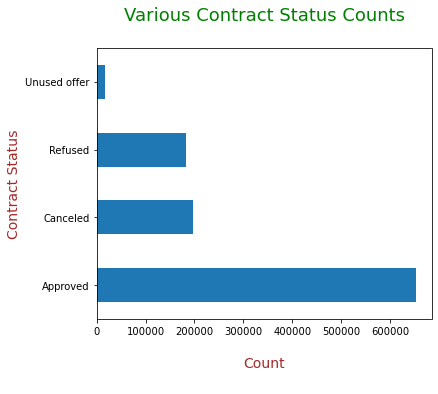

In [604]:
# To analyze 'TARGET' column whether loan defaulters are more or less ('1' = loan defaulter/did late payments, '0'= for all other case )
fig = plt.figure(figsize=(6,5))
EDA_Prev_App_list['NAME_CONTRACT_STATUS'].value_counts().plot.barh()
plt.title("Various Contract Status Counts\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nCount\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
# plt.xticks(rotation=90)
plt.ylabel("Contract Status",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences:

Inferences 1: According to the above Bargraph 'Approved' loan has highest number among all the four Contract Status whereas 'Unused offer' is very less.

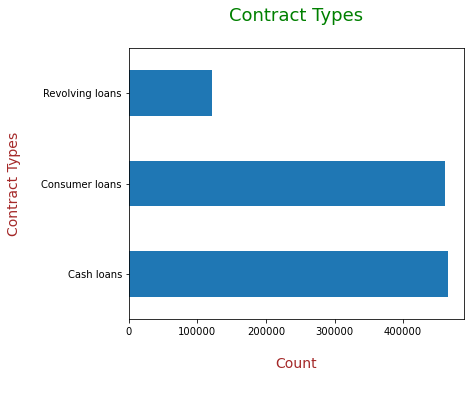

In [476]:
# To analyze 'TARGET' column whether loan defaulters are more or less ('1' = loan defaulter/did late payments, '0'= for all other case )
fig = plt.figure(figsize=(6,5))
EDA_Prev_App_list['NAME_CONTRACT_TYPE'].value_counts().plot.barh()
plt.title("Contract Types\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nCount\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
# plt.xticks(rotation=90)
plt.ylabel("Contract Types\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences:

Inferences 1: According to the above Bar-Graph maximum Cash loan and Consumer loan having negligible difference and are highest in number, whereas 'Revolving loans' are very less.

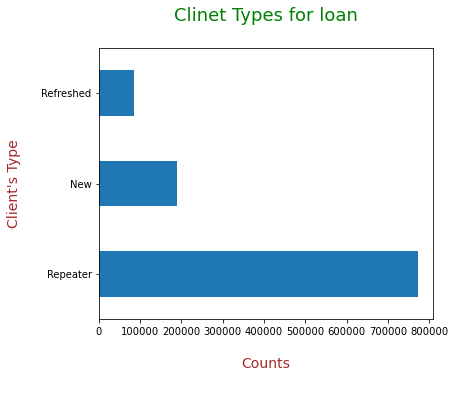

In [477]:
# To show the Types of Education
fig = plt.figure(figsize=(6,5))
EDA_Prev_App_list['NAME_CLIENT_TYPE'].value_counts().plot.barh()
plt.title("Clinet Types for loan\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nCounts\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.ylabel("Client's Type\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences:

Inferences 1: According to the above Bargraph maximum client type is 'Repeater for loan, whereas 'Refreshed' are very less.

### Bivariate/Multivariate Analysis

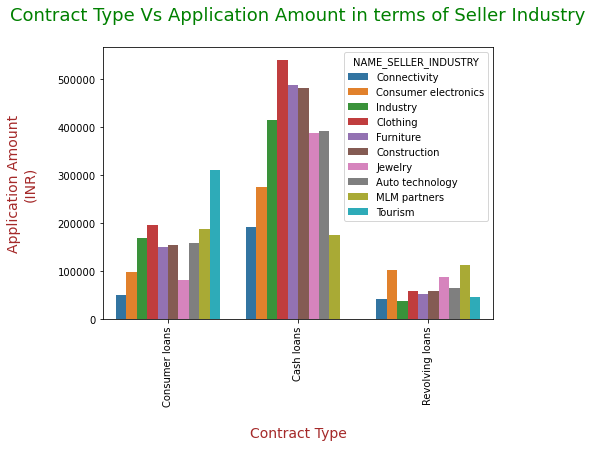

In [478]:
# To analyze various income types in relation with the Gender 
fig = plt.figure(figsize=(7,5))
sns.barplot(data=EDA_Prev_App_list, x='NAME_CONTRACT_TYPE', y='AMT_APPLICATION', hue='NAME_SELLER_INDUSTRY', ci=None)
plt.title("Contract Type Vs Application Amount in terms of Seller Industry\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nContract Type\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Application Amount\n(INR)\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences
Inferences 1: From above bargraph it is clear that among all the categories of Seller Industry Clothing has highest Application Amount for Cash loan Type Contract.

Inferences 2: Consumer loans for Tourism Seller Industry has highest Application Amount whereas it is less for Revolving loans.

In [512]:
EDA_Prev_App_list.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,Approved,17145.0,17145.0,SATURDAY,15,Repairs,15,Cash through the bank,HC,Repeater,POS,x-sell,Country-wide,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,Approved,607500.0,679671.0,THURSDAY,11,Other,11,Cash through the bank,HC,Repeater,Cash,x-sell,Contact center,Consumer electronics,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,Approved,112500.0,136444.5,TUESDAY,11,Other,11,Cash through the bank,HC,Repeater,Cash,x-sell,Credit and cash offices,Consumer electronics,high,Cash X-Sell: high
3,2819243,176158,Cash loans,Approved,450000.0,470790.0,MONDAY,7,Other,7,Cash through the bank,HC,Repeater,Cash,x-sell,Credit and cash offices,Consumer electronics,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,Refused,337500.0,404055.0,THURSDAY,9,Repairs,9,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,Consumer electronics,high,Cash Street: high


#### To do Bivariate/Multivariate Analysis

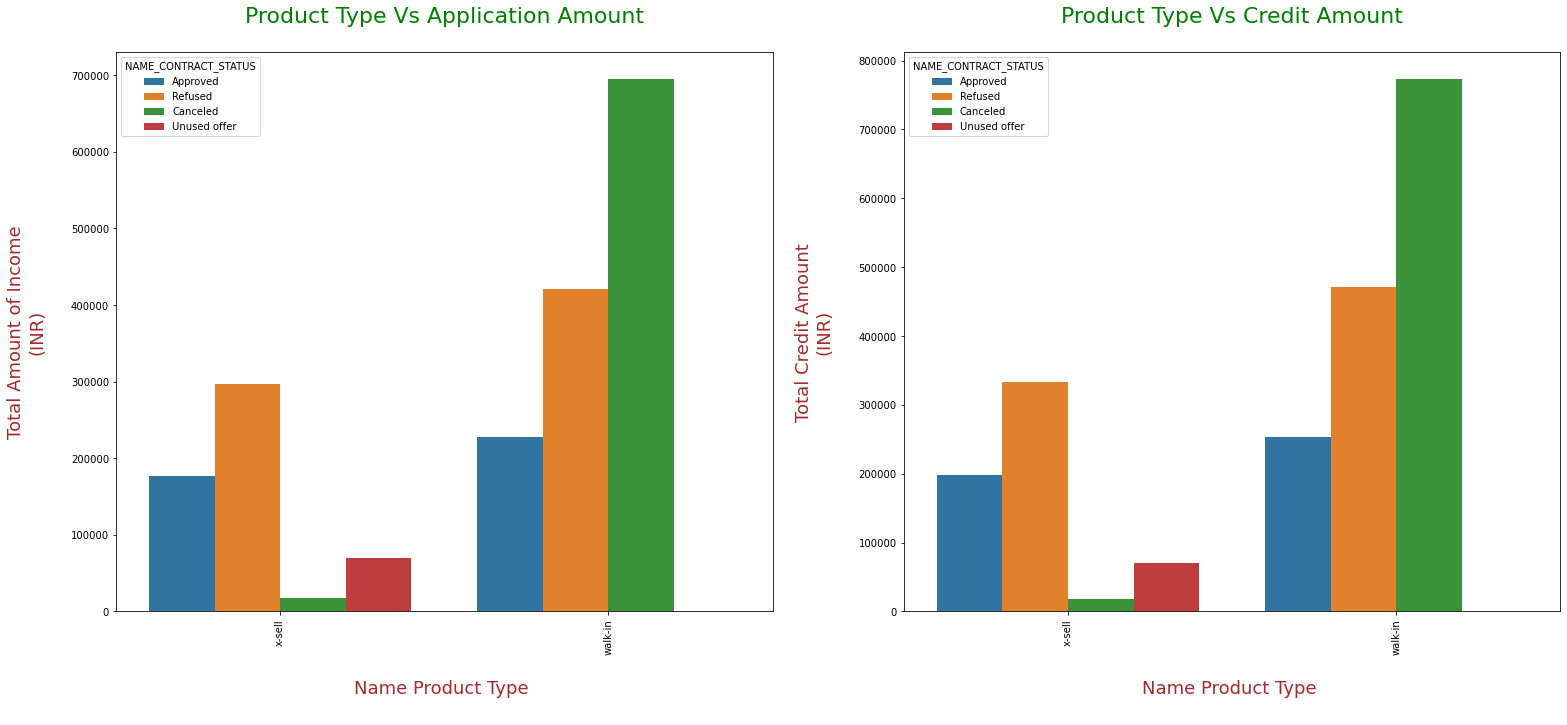

In [603]:
# To show Bar Graph
fig = plt.figure(figsize=(40,35)) 
fig1 = fig.add_subplot(3, 3, 1)    # For adding subplot side by side
sns.barplot(data=EDA_Prev_App_list, x='NAME_PRODUCT_TYPE', y='AMT_APPLICATION', hue='NAME_CONTRACT_STATUS', ci=None, ax=fig1)
plt.title("Product Type Vs Application Amount\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nName Product Type \n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Total Amount of Income\n(INR)\n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})

fig2 = fig.add_subplot(3, 3, 2)    # For adding subplot side by side
sns.barplot(data=EDA_Prev_App_list, x='NAME_PRODUCT_TYPE', y='AMT_CREDIT', hue='NAME_CONTRACT_STATUS', ci=None, ax=fig2)
plt.title("Product Type Vs Credit Amount\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nName Product Type \n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("\n\n\nTotal Credit Amount\n(INR)\n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences
Inferences 1: Canceled Contracts for 'Walk-in' Product Type is highest for higher Income Amount and Credit Amount, whereas it is very less for X-Sell Product Type.

Inferences 2: Contract Status as a Unused Offer for 'Walk-in' Product Type is lowest or almost nil for both the amounts.

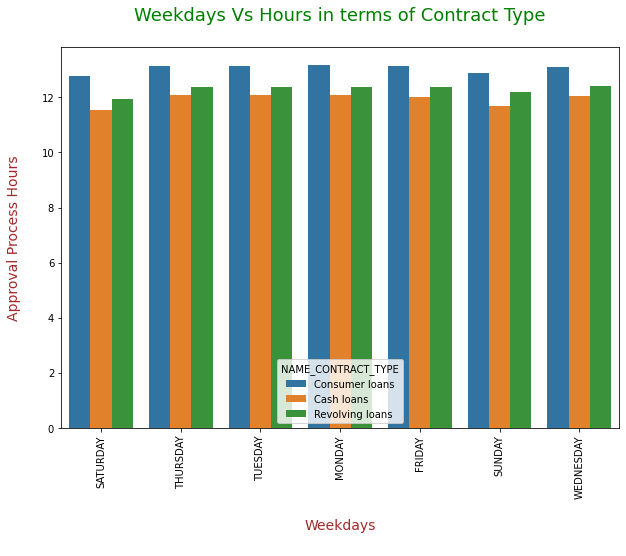

In [601]:
# To show Bar Graph between Week days, Hours in terms of Contract Type.
fig = plt.figure(figsize=(10,7)) 
sns.barplot(data=EDA_Prev_App_list, x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START', hue='NAME_CONTRACT_TYPE', ci=None)
plt.title("Weekdays Vs Hours in terms of Contract Type\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nWeekdays\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Approval Process Hours\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences
Inferences 1: Approval Process Hours are highest for each day for all kind of Contract Types whether it is Consumer loans, Cash loans or Revolving loans.

Inferences 2: Approval Process Hours are lowest for Cash loans for any day of the week.

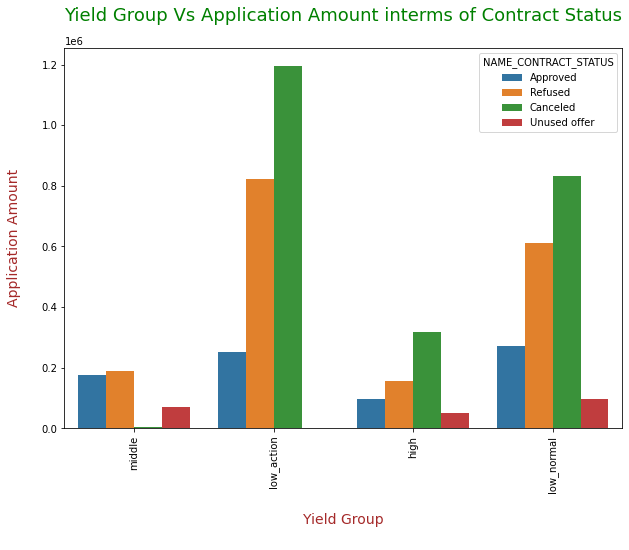

In [552]:
# To show Bar Graph
fig = plt.figure(figsize=(10,7)) 
sns.barplot(data=EDA_Prev_App_list, x='NAME_YIELD_GROUP', y='AMT_APPLICATION', hue='NAME_CONTRACT_STATUS', ci=None)
plt.title("Yield Group Vs Application Amount interms of Contract Status\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nYield Group\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Application Amount\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences
Inferences 1: Cancelled Application are higher for Higher Application amount for the three different Yield Groups i.e. Low_Action, Low_Normal, and High whereas for Middle type of Yield Group it is very-2 less.

Inferences 2: It means Cancel rate is very less minimum amount in Middle Group.

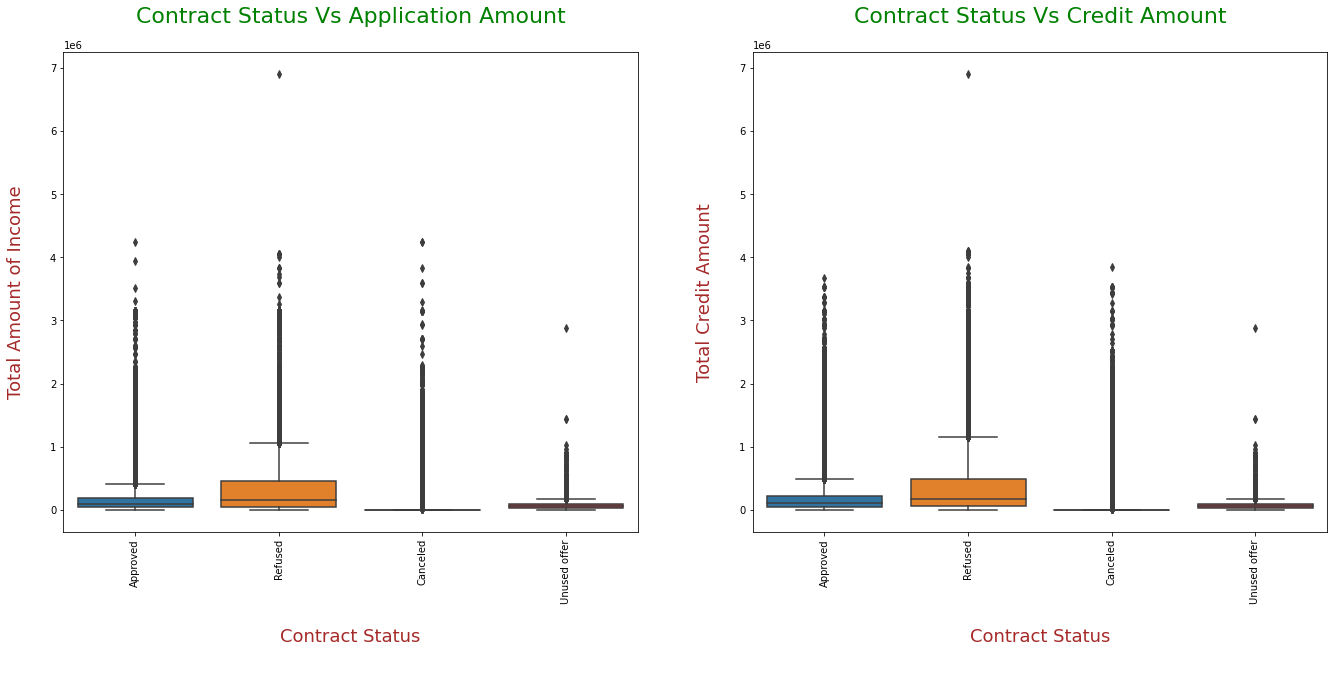

In [605]:
# Box plot - Amount (Credit/Loan Amount) Vs Contract Status.
%matplotlib inline
fig = plt.figure(figsize=(35,30)) 
fig1 = fig.add_subplot(3, 3, 1)    # For adding subplot side by side
sns.boxplot(data=EDA_Prev_App_list, x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION', ax=fig1) 
plt.title("Contract Status Vs Application Amount\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nContract Status\n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Total Amount of Income\n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})

fig2 = fig.add_subplot(3, 3, 2)    # For adding subplot side by side
sns.boxplot(data=EDA_Prev_App_list, x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', ax=fig2)
plt.title("Contract Status Vs Credit Amount\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nContract Status\n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("\n\n\nTotal Credit Amount\n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})
plt.show()


### Inferences
Inferences 1: Distribution of values for all kind of Contract Status has almost similar kind of distribution for both the Amounts whether it is Total Amount or Credit Amount.

Inferencces 2: For Refused Contract, distribution is unequal for both the amount whether it is Total Incomme Amount or Credit Amount.

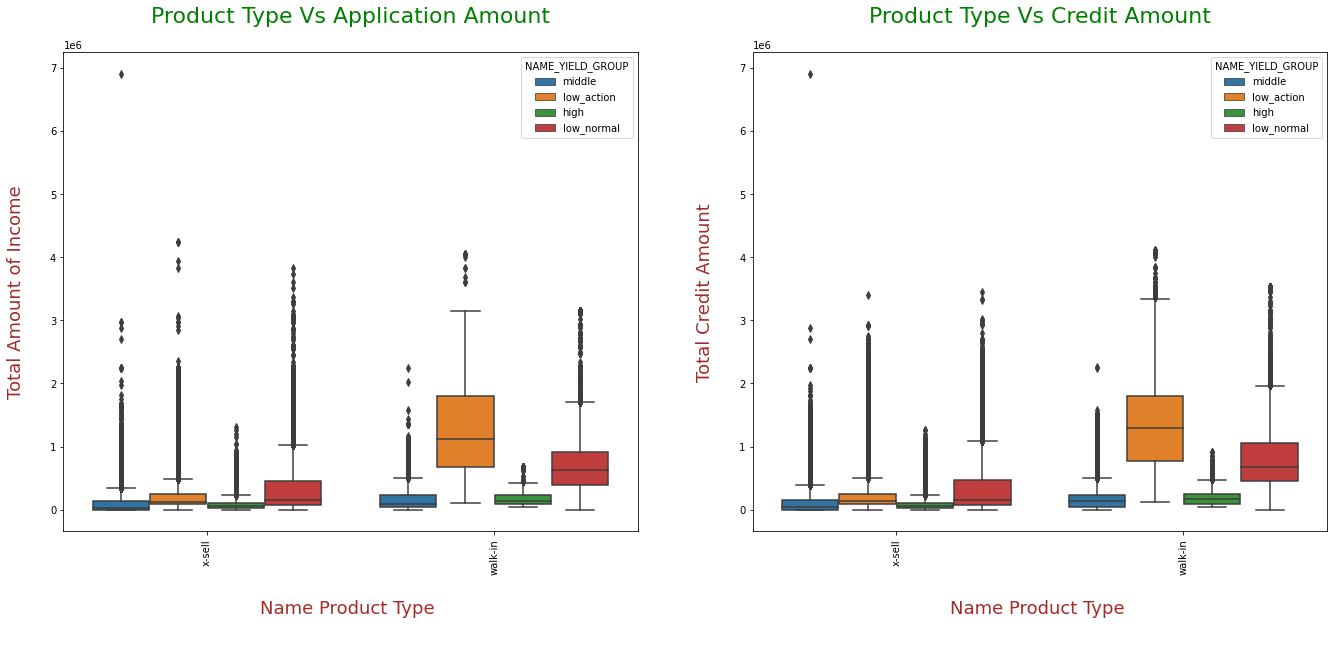

In [606]:
# Box plot - Amount (Credit/Loan Amount) Vs Product Type for various yield groups.
%matplotlib inline
fig = plt.figure(figsize=(35,30)) 
fig1 = fig.add_subplot(3, 3, 1)    # For adding subplot side by side
sns.boxplot(data=EDA_Prev_App_list, x='NAME_PRODUCT_TYPE', y='AMT_APPLICATION', hue='NAME_YIELD_GROUP', ax=fig1) 
plt.title("Product Type Vs Application Amount\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nName Product Type \n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Total Amount of Income\n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})

fig2 = fig.add_subplot(3, 3, 2)    # For adding subplot side by side
sns.boxplot(data=EDA_Prev_App_list, x='NAME_PRODUCT_TYPE', y='AMT_CREDIT', hue='NAME_YIELD_GROUP', ax=fig2)
plt.title("Product Type Vs Credit Amount\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nName Product Type \n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("\n\n\nTotal Credit Amount\n",fontdict={'fontsize':18,'fontweight':5,'color':'Brown'})
plt.show()

### Inferences
Inferences 1: Distribution of values for both the Product Types (X-Sell, Walk-in) has almost similar for all kind of Yiled Groups whether it is Total Amount or Credit Amount.

Inferences 2: For low_action Yield Group distribution is equal for product type 'Walk-in' whether it is Total income Amount or Total Credit Amount.

In [506]:
# To find out Correlation among various variables of dataset
EDA_Prev_App_list_corr = EDA_Prev_App_list.iloc[:,2:]
EDA_Prev_App_list_2 = EDA_Prev_App_list_corr.corr(method='pearson', min_periods=1)

In [589]:
# To show Correlation data table with heads
EDA_Prev_App_list_corr.head()

,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,Approved,17145.0,17145.0,SATURDAY,15,Repairs,15,Cash through the bank,HC,Repeater,POS,x-sell,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,Approved,607500.0,679671.0,THURSDAY,11,Other,11,Cash through the bank,HC,Repeater,Cash,x-sell,Contact center,Consumer electronics,low_action,Cash X-Sell: low
2,Cash loans,Approved,112500.0,136444.5,TUESDAY,11,Other,11,Cash through the bank,HC,Repeater,Cash,x-sell,Credit and cash offices,Consumer electronics,high,Cash X-Sell: high
3,Cash loans,Approved,450000.0,470790.0,MONDAY,7,Other,7,Cash through the bank,HC,Repeater,Cash,x-sell,Credit and cash offices,Consumer electronics,middle,Cash X-Sell: middle
4,Cash loans,Refused,337500.0,404055.0,THURSDAY,9,Repairs,9,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,Consumer electronics,high,Cash Street: high


In [508]:
# To show Correlation Chart
EDA_Prev_App_list_2

,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,DAYS_DECISION
AMT_APPLICATION,1.000000,0.975757,-0.015140,-0.015140
AMT_CREDIT,0.975757,1.000000,-0.021909,-0.021909
HOUR_APPR_PROCESS_START,-0.015140,-0.021909,1.000000,1.000000
DAYS_DECISION,-0.015140,-0.021909,1.000000,1.000000


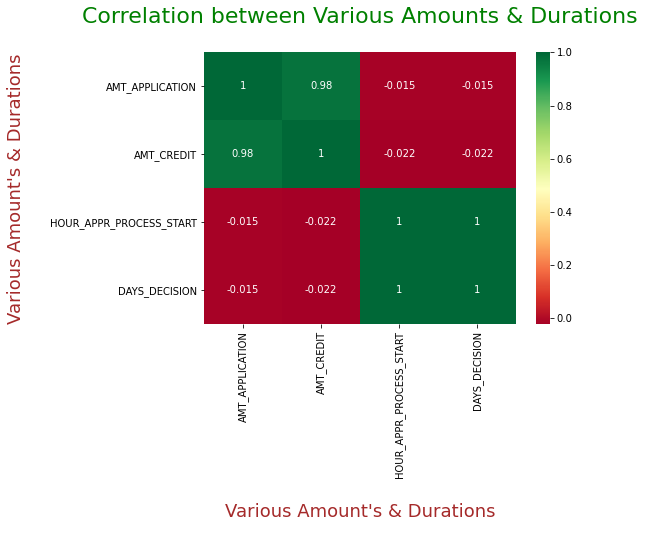

In [607]:
# Heatmap to show coorelation among all the numeric variables.
fig = plt.figure(figsize=(7,5))
sns.heatmap(EDA_Prev_App_list_2, cmap="RdYlGn", annot=True)
plt.title("Correlation between Various Amounts & Durations\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nVarious Amount's & Durations\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Various Amount's & Durations\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.show()


### Inferences

Inference 1: Application Amount is inversaly proportional to the no. of Days Decision and required total Approval hours. It means higher Application Amount is sanctioned in less no. of days. and Application Process start in less no. of hours.

Inference 2: Credit Amount is also inversaly proportional to the no. of Days Decision and required total Approval hours. It means higher Credited Amount is sanctioned in less no. of days. and Application Process start in less no. of hours.

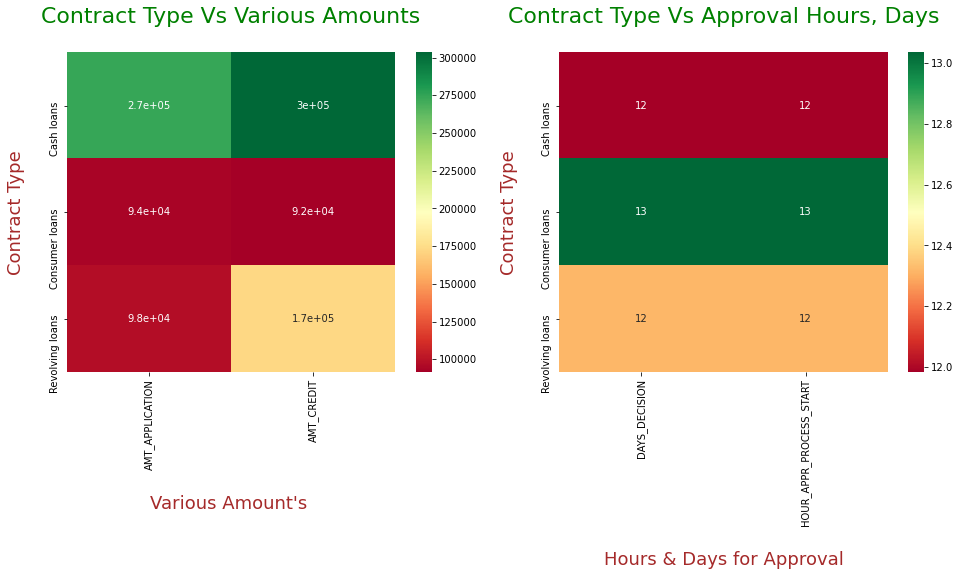

In [610]:
# Heatmap to show relation among various parameters.
fig = plt.figure(figsize=(25,20)) 
fig1 = fig.add_subplot(3, 3, 1)    # For adding subplot side by side
Prev_Income_Bucket = EDA_Prev_App_list.groupby('NAME_CONTRACT_TYPE')['AMT_APPLICATION','AMT_CREDIT'].mean()
sns.heatmap(Prev_Income_Bucket, cmap="RdYlGn", annot=True, ax=fig1)
plt.title("Contract Type Vs Various Amounts\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nVarious Amount's \n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Contract Type\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})

fig2 = fig.add_subplot(3, 3, 2)    # For adding subplot side by side
Prev_Income_Bucket = EDA_Prev_App_list.groupby('NAME_CONTRACT_TYPE')['DAYS_DECISION','HOUR_APPR_PROCESS_START'].mean()
sns.heatmap(Prev_Income_Bucket, cmap="RdYlGn", annot=True, ax=fig2)
plt.title("Contract Type Vs Approval Hours, Days\n", fontdict={'fontsize':22,'fontweight':5,'color':'Green'})
plt.xlabel("\nHours & Days for Approval",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("\nContract Type\n",fontdict={'fontsize':18,'fontweight':8,'color':'Brown'})
plt.show() 


### Inferences

Inference 1: Cash loan are highest for Amount Credited and Application Amount. 

Inference 2: Revolving loans has very less value for Amount Credited.

Inference 3: Revolving loans approved in very less no. of days and it's Process also started in minimum hours, whereas Cash loans are taking more no. of days to approve and more hours to start the process.

Inference 4: Overall Revolving loans are taking less hours, minimum no. of days in decision but their loan amount and Credited amount is also less.

### End of the Analysis for the 'Previous Application-Data' set